<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/IntermediateAssesment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load training and test data from separate files
train_data = pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data.csv')

In [2]:
train_data.shape
train_data.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [3]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [5]:
print(train_data['is_promoted'].value_counts())

is_promoted
0    50140
1     4668
Name: count, dtype: int64


In [6]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
# EDA on test data
test_data.shape

(23490, 13)

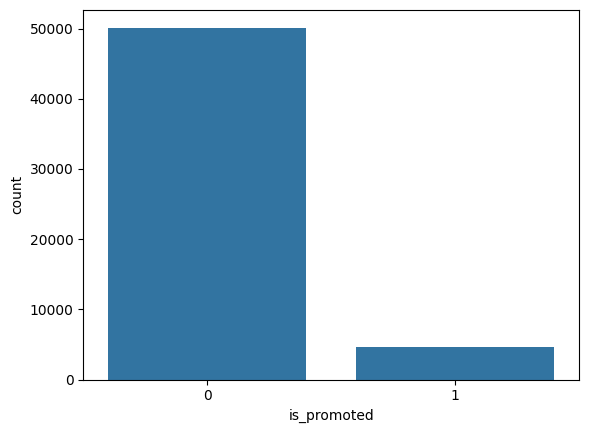

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='is_promoted', data=train_data)
plt.show()

In [9]:
# Preprocessing

train_data.fillna(train_data.mean(numeric_only=True), inplace=True)
test_data.fillna(test_data.mean(numeric_only=True), inplace=True)

# Categorical
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)


<ipython-input-9-f7ec2711d4a7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mode()[0], inplace=True)
<ipython-input-9-f7ec2711d4a7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [10]:
# Encoding
from sklearn.preprocessing import OneHotEncoder
cat_cols=['department','region','education','gender','recruitment_channel']
encoder=OneHotEncoder(sparse_output=False)
train_encoded=pd.DataFrame(encoder.fit_transform(train_data[cat_cols]))
test_encoded=pd.DataFrame(encoder.transform(test_data[cat_cols]))

train_encoded.index=train_data.index
test_encoded.index=test_data.index

# Drop original categorical and concat
train_data=train_data.drop(columns=cat_cols).join(train_encoded)
test_data=test_data.drop(columns=cat_cols).join(test_encoded)


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
num_cols=['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']
train_data[num_cols]=scaler.fit_transform(train_data[num_cols])
test_data[num_cols]=scaler.transform(test_data[num_cols])

In [12]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X=train_data.drop('is_promoted',axis=1)
y=train_data['is_promoted']
X.columns=X.columns.astype(str)

In [13]:
model=RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [15]:
test_data.columns=test_data.columns.astype(str)
test_prediction1=model.predict(test_data)
sample_submission=pd.read_csv('/content/sample_submission_M0L0uXE(1).csv')
sample_submission['is_promoted']=test_prediction
sample_submission.to_csv('submission.csv',index=False)

In [16]:
sample_submission.head()
sample_submission.shape


(23490, 2)

In [17]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()